# Solve Any Data Analysis Problem

## Chapter 6 - Project 5 - Example solution

Original survey data from https://insights.stackoverflow.com/survey

In [1]:
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt

In [2]:
survey = pd.read_csv("./data/survey_results_public.csv.gz")
print(survey.shape)
survey.head()

(89184, 84)


,ResponseId,Q120,MainBranch,Age,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,ProfessionalTech,Industry,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,I agree,None of these,18-24 years old,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I agree,I am a developer by profession,25-34 years old,"Employed, full-time",Remote,Hobby;Contribute to open-source projects;Boots...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;Friend or fam...,Formal documentation provided by the owner of ...,...,1-2 times a week,10+ times a week,Never,15-30 minutes a day,15-30 minutes a day,DevOps function;Microservices;Automated testin...,"Information Services, IT, Software Development...",Appropriate in length,Easy,285000.0
2,3,I agree,I am a developer by profession,45-54 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby;Professional development or self-paced l...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Formal documentation provided by the owner of ...,...,6-10 times a week,6-10 times a week,3-5 times a week,30-60 minutes a day,30-60 minutes a day,DevOps function;Microservices;Automated testin...,"Information Services, IT, Software Development...",Appropriate in length,Easy,250000.0
3,4,I agree,I am a developer by profession,25-34 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Colleague;Friend or family member;Other online...,Formal documentation provided by the owner of ...,...,1-2 times a week,10+ times a week,1-2 times a week,15-30 minutes a day,30-60 minutes a day,Automated testing;Continuous integration (CI) ...,NaN,Appropriate in length,Easy,156000.0
4,5,I agree,I am a developer by profession,25-34 years old,"Employed, full-time;Independent contractor, fr...",Remote,Hobby;Contribute to open-source projects;Profe...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Online Courses or Certi...,Formal documentation provided by the owner of ...,...,1-2 times a week,1-2 times a week,3-5 times a week,60-120 minutes a day,30-60 minutes a day,Microservices;Automated testing;Observability ...,Other,Appropriate in length,Neither easy nor difficult,23456.0


In [3]:
survey.isnull().sum()

ResponseId                 0
Q120                       0
MainBranch                 0
Age                        0
Employment              1286
                       ...  
ProfessionalTech       47401
Industry               52410
SurveyLength            2699
SurveyEase              2630
ConvertedCompYearly    41165
Length: 84, dtype: int64

In [4]:
survey.isnull().sum().loc[lambda x: x>0]

Employment              1286
RemoteWork             15374
CodingActivities       15420
EdLevel                 1211
LearnCode               1521
                       ...  
ProfessionalTech       47401
Industry               52410
SurveyLength            2699
SurveyEase              2630
ConvertedCompYearly    41165
Length: 80, dtype: int64

That's 80/84 columns that have NULLs.

The data dictionary is also machine-readable so we can investigate which questions were mandatory and see where we're missing mandatory data.

In [5]:
data_dict = pd.read_csv("./data/survey_results_schema.csv")
print(data_dict.shape)
data_dict.head(10)

(78, 6)


,qid,qname,question,force_resp,type,selector
0,QID16,S0,"<div><span style=""font-size:19px;""><strong>Hel...",False,DB,TB
1,QID12,MetaInfo,Browser Meta Info,False,Meta,Browser
2,QID310,Q310,"<div><span style=""font-size:19px;""><strong>You...",False,DB,TB
3,QID312,Q120,,True,MC,SAVR
4,QID1,S1,"<span style=""font-size:22px; font-family: aria...",False,DB,TB
5,QID2,MainBranch,Which of the following options best describes ...,True,MC,SAVR
6,QID127,Age,What is your age? *,True,MC,MAVR
7,QID296,Employment,Which of the following best describes your cur...,False,MC,MAVR
8,QID308,RemoteWork,Which best describes your current work situation?,False,MC,SAVR
9,QID297,CodingActivities,Which of the following best describes the code...,False,MC,MAVR


In [6]:
data_dict["force_resp"].value_counts(dropna=False)

False    58
NaN      11
True      9
Name: force_resp, dtype: int64

9 mandatory questions! Let's find those and see where we have NULLs for questions that were mandatory.

First, we should see if the data dictionary column names match our data.

In [7]:
len(set(survey.columns).intersection(set(data_dict["qname"])))

50

That's 50 column names in our survey that also appear in our data dictionary.

What doesn't?

In [8]:
set(survey.columns) - set(data_dict["qname"])

{'AIDevHaveWorkedWith',
 'AIDevWantToWorkWith',
 'AINextNeither different nor similar',
 'AINextSomewhat different',
 'AINextSomewhat similar',
 'AINextVery different',
 'AINextVery similar',
 'AISearchHaveWorkedWith',
 'AISearchWantToWorkWith',
 'AIToolCurrently Using',
 'AIToolInterested in Using',
 'AIToolNot interested in Using',
 'ConvertedCompYearly',
 'DatabaseHaveWorkedWith',
 'DatabaseWantToWorkWith',
 'LanguageHaveWorkedWith',
 'LanguageWantToWorkWith',
 'MiscTechHaveWorkedWith',
 'MiscTechWantToWorkWith',
 'NEWCollabToolsHaveWorkedWith',
 'NEWCollabToolsWantToWorkWith',
 'OfficeStackAsyncHaveWorkedWith',
 'OfficeStackAsyncWantToWorkWith',
 'OfficeStackSyncHaveWorkedWith',
 'OfficeStackSyncWantToWorkWith',
 'OpSysPersonal use',
 'OpSysProfessional use',
 'PlatformHaveWorkedWith',
 'PlatformWantToWorkWith',
 'ResponseId',
 'ToolsTechHaveWorkedWith',
 'ToolsTechWantToWorkWith',
 'WebframeHaveWorkedWith',
 'WebframeWantToWorkWith'}

One example is the columns `'AIToolCurrently Using'`, `'AIToolInterested in Using'`, and `'AIToolNot interested in Using'` that are unaccounted for.

These look like different multiple choice options for the same question.

The question _Which parts of your development workflow are you currently using AI tools for and which are you interested in using AI tools for over the next year? Please select all that apply._ has checkbox options for "Currently using", "Interested in using", and "Not interested in using", the answers to which are recorded across the three columns.

In [9]:
survey[['AIToolCurrently Using',
        'AIToolInterested in Using',
        'AIToolNot interested in Using']].head()

,AIToolCurrently Using,AIToolInterested in Using,AIToolNot interested in Using
0,NaN,NaN,NaN
1,Writing code;Committing and reviewing code,Learning about a codebase;Writing code;Debuggi...,NaN
2,NaN,NaN,NaN
3,NaN,NaN,NaN
4,Learning about a codebase;Writing code;Documen...,Project planning;Testing code;Committing and r...,NaN


So we can't easily match mandatory columns to columns in the response automatically, but we can investigate some examples.

In [10]:
data_dict[data_dict["force_resp"] == True]

,qid,qname,question,force_resp,type,selector
3,QID312,Q120,,True,MC,SAVR
5,QID2,MainBranch,Which of the following options best describes ...,True,MC,SAVR
6,QID127,Age,What is your age? *,True,MC,MAVR
11,QID25,EdLevel,Which of the following best describes the high...,True,MC,SAVR
22,QID6,Country,"Where do you live? <span style=""font-weight: b...",True,MC,DL
23,QID50,Currency,Which currency do you use day-to-day? If your ...,True,MC,DL
39,QID266,NEWSOSites,Which of the following Stack Overflow sites ha...,True,MC,MAVR
46,QID314,AISelect,Do you currently use AI tools in your developm...,True,MC,SAVR
54,QID299,TBranch,"<span style=""font-size:16px;"">Would you like t...",True,MC,SAVR


According to our checks earlier, EdLevel for example should have no NULL values:

In [11]:
survey[survey["EdLevel"].isnull()]

,ResponseId,Q120,MainBranch,Age,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,ProfessionalTech,Industry,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,I agree,None of these,18-24 years old,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
70,71,I agree,None of these,45-54 years old,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
304,305,I agree,None of these,18-24 years old,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
733,734,I agree,None of these,45-54 years old,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
875,876,I agree,None of these,45-54 years old,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88820,88821,I agree,None of these,35-44 years old,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
88828,88829,I agree,None of these,25-34 years old,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
88830,88831,I agree,None of these,18-24 years old,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
89028,89029,I agree,None of these,45-54 years old,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


OK now we're onto something, these look like non-responses that we can filter out.

In [12]:
survey[survey["EdLevel"].isnull()].isnull().sum(axis=1).sort_values()

0        80
65302    80
65252    80
65037    80
64859    80
         ..
43794    80
43573    80
43567    80
43519    80
89159    80
Length: 1211, dtype: int64

That's exactly 80 NULLs per response where `EdLevel` is missing. These can all be safely removed.

In [13]:
survey = survey.dropna(subset=survey.columns[4:], how="all")
survey.isnull().sum().loc[lambda x: x>0]

Employment                75
RemoteWork             14163
CodingActivities       14209
LearnCode                310
LearnCodeOnline        17889
                       ...  
ProfessionalTech       46190
Industry               51199
SurveyLength            1488
SurveyEase              1419
ConvertedCompYearly    39954
Length: 76, dtype: int64

Only 76 columns with NULLs now.

Let's look at some of these multiple choice questions that still have missing data. We're looking for mandatory columns that aren't in this list (of columns with no missing data):

In [14]:
survey.isnull().sum().loc[lambda x: x==0]

ResponseId    0
Q120          0
MainBranch    0
Age           0
EdLevel       0
Country       0
NEWSOSites    0
AISelect      0
dtype: int64

Currency seems to be the last one, the other mandatory one with missing data is `TBranch`, but that's only about participation in a series, not a real survey question of interest here.

In [15]:
survey[survey["Currency"].isnull()].isnull().sum(axis=1)

9        33
35       51
46       42
47       52
49       36
         ..
89173    16
89176    37
89180    33
89181    54
89182    30
Length: 22639, dtype: int64

These are over 20,000 responses with missing currency data and a varying number of missing answers, so missing currency data is not immediately suspicious apart from the fact that it was mandatory.

In [16]:
survey["Currency"].value_counts()

EUR European Euro            17651
USD\tUnited States dollar    16729
GBP\tPound sterling           4473
INR\tIndian rupee             3615
CAD\tCanadian dollar          2647
                             ...  
SDG\tSudanese pound              1
JEP\tJersey pound                1
KMF\tComorian franc              1
CVE\tCape Verdean escudo         1
SSP\tSouth Sudanese pound        1
Name: Currency, Length: 144, dtype: int64

Let's chalk that up to technical error and move on for now.

Time to explore our AI-related columns more closely.

In [17]:
ai_columns = [c for c in survey.columns if "AI" in c]
survey[ai_columns].head()

,AISearchHaveWorkedWith,AISearchWantToWorkWith,AIDevHaveWorkedWith,AIDevWantToWorkWith,SOAI,AISelect,AISent,AIAcc,AIBen,AIToolInterested in Using,AIToolCurrently Using,AIToolNot interested in Using,AINextVery different,AINextNeither different nor similar,AINextSomewhat similar,AINextVery similar,AINextSomewhat different
1,ChatGPT,ChatGPT;Neeva AI,GitHub Copilot,GitHub Copilot,"I don't think it's super necessary, but I thin...",Yes,Indifferent,Other (please explain),Somewhat distrust,Learning about a codebase;Writing code;Debuggi...,Writing code;Committing and reviewing code,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,"No, and I don't plan to",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,I'm wearing of Stack Overflow using AI.,"No, and I don't plan to",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ChatGPT,ChatGPT,NaN,NaN,Using AI to suggest better answer to my questi...,Yes,Very favorable,Increase productivity;Greater efficiency;Speed...,Somewhat trust,Project planning;Testing code;Committing and r...,Learning about a codebase;Writing code;Documen...,NaN,NaN,NaN,NaN,NaN,NaN
5,ChatGPT;Google Bard AI;Neeva AI,NaN,GitHub Copilot;Tabnine,NaN,NaN,Yes,Favorable,Greater efficiency,Somewhat trust,Learning about a codebase;Documenting code;Tes...,Writing code;Debugging and getting help,Project planning,NaN,NaN,NaN,NaN,NaN


Basic question: what is the distribution of how people want to use AI?

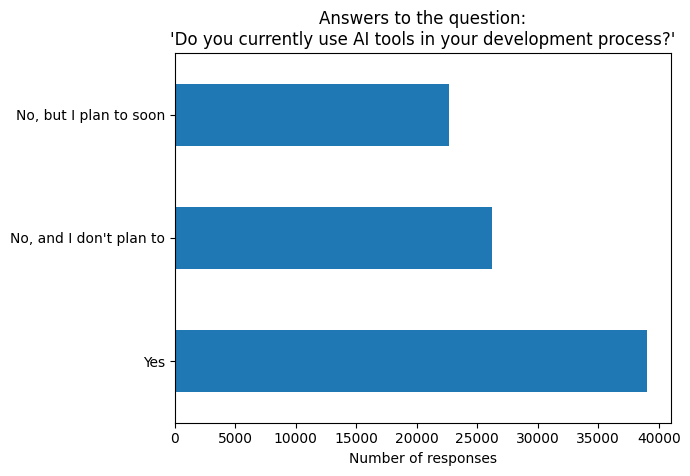

In [18]:
fig, axis = plt.subplots()

(
    survey["AISelect"]
    .value_counts(dropna=False)
    .plot
    .barh(ax=axis)
)

axis.set(title="Answers to the question:\n'Do you currently use AI tools in your development process?'",
         xlabel="Number of responses")

plt.show()

What is the intersection of these answers and how favorably AI is viewed?

This second question was optional, so let's look at missing values

In [19]:
survey["AISent"].value_counts(dropna=False)

Favorable           29863
NaN                 26472
Very favorable      17050
Indifferent         10147
Unsure               2471
Unfavorable          1698
Very unfavorable      272
Name: AISent, dtype: int64

Plenty of NULLs, which in this case means "no answer given" - we might as well make that a category.

Let's also convert the column to a correct Categorical type.

In [20]:
survey["AISent"] = (
    pd.Categorical(
        survey["AISent"].fillna("No answer given"),
        categories=['No answer given', 'Unsure',
                    'Very unfavorable', 'Unfavorable',
                    'Indifferent', 'Favorable', 'Very favorable'],
        ordered=True)
)

survey["AISent"].value_counts(dropna=False).sort_index()

No answer given     26472
Unsure               2471
Very unfavorable      272
Unfavorable          1698
Indifferent         10147
Favorable           29863
Very favorable      17050
Name: AISent, dtype: int64

In [21]:
pd.crosstab(
    index=survey["AISelect"],
    columns=survey["AISent"]
)

AISent,No answer given,Unsure,Very unfavorable,Unfavorable,Indifferent,Favorable,Very favorable
AISelect,,,,,,,
"No, and I don't plan to",26221,0,0,0,0,0,0
"No, but I plan to soon",155,1762,129,927,5858,10790,3089
Yes,96,709,143,771,4289,19073,13961


Makes sense that people who said "no" either didn't get the optional follow-up question, or chose to skip over it.

Let's exclude them and see this table as a heatmap.

We'll probably create more heatmaps so it should be a reusable function.

In [22]:
def create_heatmap(data, square=True):
    fig, axis = plt.subplots()

    sns.heatmap(
        data=data,
        cmap="Greys",
        vmin=0,
        vmax=1,
        square=square,
        annot=True,
        ax=axis
    )

    return fig, axis

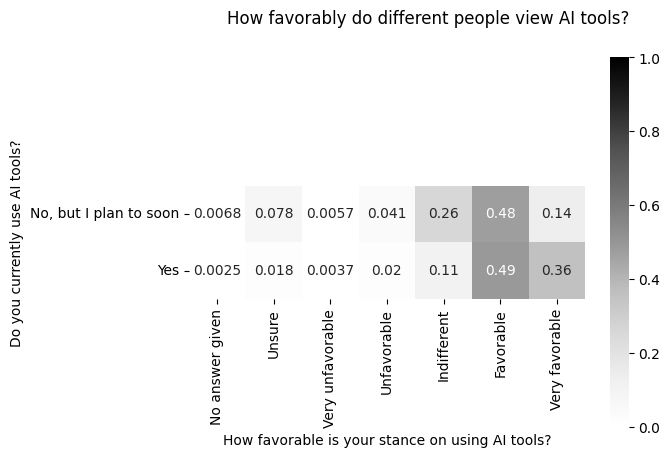

In [23]:
fig, axis = create_heatmap(
    pd.crosstab(
        index=survey.loc[survey["AISelect"] != "No, and I don't plan to", "AISelect"],
        columns=survey.loc[survey["AISelect"] != "No, and I don't plan to", "AISent"],
        normalize="index"
    )
)

fig.suptitle("How favorably do different people view AI tools?")

axis.set(
    xlabel="How favorable is your stance on using AI tools?",
    ylabel="Do you currently use AI tools?"
)

plt.show()

Not too surprising - people who already use AI view it favorably (otherwise they wouldn't use it!), and people who don't (yet) are more likely to be indifferent (for now).

What about trust?

In [24]:
survey["AIBen"].unique()

array(['Somewhat distrust', nan, 'Somewhat trust',
       'Neither trust nor distrust', 'Highly distrust', 'Highly trust'],
      dtype=object)

Again, let's fill in missing values and look at the distribution

In [25]:
survey["AIBen"] = (
    pd.Categorical(
        survey["AIBen"].fillna("No answer given"),
        categories=['No answer given', 'Highly distrust',
                    'Somewhat distrust', 'Neither trust nor distrust',
                    'Somewhat trust', 'Highly trust'],
        ordered=True
    )
)

survey["AIBen"].value_counts(dropna=False).sort_index()

No answer given               26577
Highly distrust                3350
Somewhat distrust             13330
Neither trust nor distrust    18837
Somewhat trust                24128
Highly trust                   1751
Name: AIBen, dtype: int64

And now look at this against those who already use AI vs those that don't

In [26]:
pd.crosstab(
    index=survey["AISelect"],
    columns=survey["AIBen"]
)

AIBen,No answer given,Highly distrust,Somewhat distrust,Neither trust nor distrust,Somewhat trust,Highly trust
AISelect,,,,,,
"No, and I don't plan to",26221,0,0,0,0,0
"No, but I plan to soon",202,1303,5975,8085,6764,381
Yes,154,2047,7355,10752,17364,1370


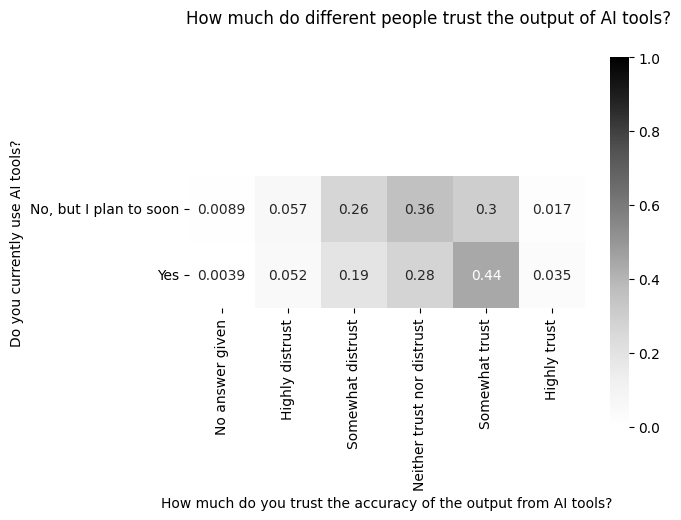

In [27]:
fig, axis = create_heatmap(
    pd.crosstab(
        index=survey.loc[survey["AISelect"] != "No, and I don't plan to", "AISelect"],
        columns=survey.loc[survey["AISelect"] != "No, and I don't plan to", "AIBen"],
        normalize="index"
    )
)

fig.suptitle("How much do different people trust the output of AI tools?")

axis.set(
    xlabel="How much do you trust the accuracy of the output from AI tools?",
    ylabel="Do you currently use AI tools?"
)

plt.show()

People who don't use AI tools are more likely to distrust and less likely to trust the AI outputs. Almost no one "highly trusts" the output, but AI tool users are more likely to "somewhat" trust them.

Let's look at the different parts of the developer workflow and see how people rate the favorability and accuracy of AI in those contexts.

We'll restrict this to people already using it.

In [28]:
(
    survey.loc[survey["AISelect"] == "Yes", "AIToolCurrently Using"]
    .dropna()
    .head(10)
)

1            Writing code;Committing and reviewing code
4     Learning about a codebase;Writing code;Documen...
5               Writing code;Debugging and getting help
6               Writing code;Debugging and getting help
7     Project planning;Writing code;Debugging and ge...
9               Writing code;Debugging and getting help
11                            Writing code;Testing code
13              Writing code;Debugging and getting help
15                                         Writing code
16                                         Writing code
Name: AIToolCurrently Using, dtype: object

These are semicolon-delimited values, which we need to "break out" into multiple indicator (binary yes/no) columns.

A perfect use case for AI to tell us how to do this.

ChatGPT suggests `df['column'].str.get_dummies(sep='; ')` so let's try that!

In [29]:
ai_tool_indicators = (
    survey.loc[survey["AISelect"] == "Yes", "AIToolCurrently Using"]
    .str.get_dummies(sep=";")
)
ai_tool_indicators

,Collaborating with teammates,Committing and reviewing code,Debugging and getting help,Deployment and monitoring,Documenting code,Learning about a codebase,Other (please describe),Project planning,Testing code,Writing code
1,0,1,0,0,0,0,0,0,0,1
4,0,0,1,0,1,1,0,0,0,1
5,0,0,1,0,0,0,0,0,0,1
6,0,0,1,0,0,0,0,0,0,1
7,0,0,1,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...
89176,0,0,0,0,1,1,0,1,0,1
89179,0,0,1,0,1,0,0,0,0,1
89180,0,0,1,0,0,1,0,0,0,0
89182,0,0,1,1,0,1,0,0,0,1


That's.... perfect!

Let's check those column names to make sure that using the `;` separator didn't leave in unwanted spaces

In [30]:
ai_tool_indicators.columns

Index(['Collaborating with teammates ', 'Committing and reviewing code',
       'Debugging and getting help', 'Deployment and monitoring',
       'Documenting code', 'Learning about a codebase',
       'Other (please describe)', 'Project planning', 'Testing code',
       'Writing code'],
      dtype='object')

Let's clean that up

In [31]:
ai_tool_indicators.columns = [c.strip() for c in ai_tool_indicators.columns]

Since these are already filtered to people who already use AI, we can find out the percentage of people who ticked each option.

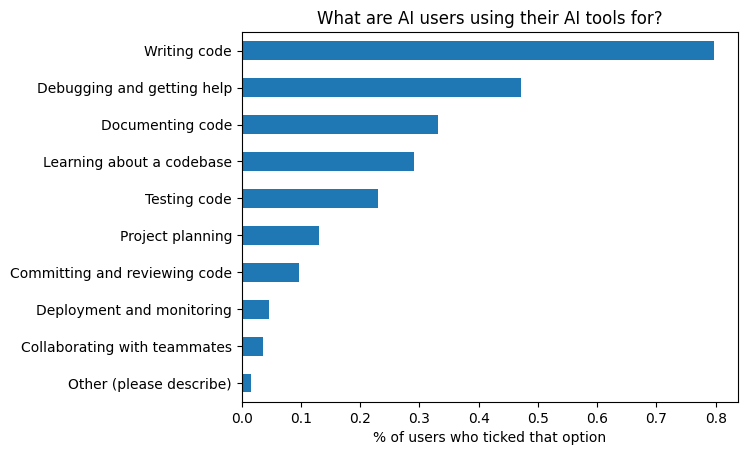

In [32]:
fig, axis = plt.subplots()

(
    ai_tool_indicators
    .mean()
    .sort_values()
    .plot
    .barh(ax=axis)
)

axis.set(
    title="What are AI users using their AI tools for?",
    xlabel="% of users who ticked that option"
)

plt.show()

Let's tack these indicator columns onto our original data to dig in further.

In [33]:
# concat will by default match on indices
survey_ai_users = (
    pd.concat([survey, ai_tool_indicators], axis=1)
    .dropna(subset=ai_tool_indicators.columns, how="any") # drop nulls
)

assert len(survey[survey["AISelect"] == "Yes"]) == len(survey_ai_users)

survey_ai_users.head()

,ResponseId,Q120,MainBranch,Age,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,Collaborating with teammates,Committing and reviewing code,Debugging and getting help,Deployment and monitoring,Documenting code,Learning about a codebase,Other (please describe),Project planning,Testing code,Writing code
1,2,I agree,I am a developer by profession,25-34 years old,"Employed, full-time",Remote,Hobby;Contribute to open-source projects;Boots...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;Friend or fam...,Formal documentation provided by the owner of ...,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,5,I agree,I am a developer by profession,25-34 years old,"Employed, full-time;Independent contractor, fr...",Remote,Hobby;Contribute to open-source projects;Profe...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Online Courses or Certi...,Formal documentation provided by the owner of ...,...,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
5,6,I agree,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Hobby;Professional development or self-paced l...,Some college/university study without earning ...,Books / Physical media;Colleague;Online Course...,Formal documentation provided by the owner of ...,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
6,7,I agree,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Hobby;Contribute to open-source projects;Profe...,Some college/university study without earning ...,Friend or family member;Online Courses or Cert...,NaN,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
7,8,I agree,I am a developer by profession,25-34 years old,"Employed, full-time",Remote,Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Online Courses or Certi...,Formal documentation provided by the owner of ...,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


Now we can look at favorability and accuracy for each AI tool use case.

For each possible option, out of all the people who ticked that they are using AI for it, what % viewed it favorably and what % trust the output?

In [34]:
(
    survey_ai_users[survey_ai_users["Collaborating with teammates"] == 1]
    .groupby("AISent")
    .size()
    .reset_index(name="count")
    .assign(option="Collaborating with teammates")
)

,AISent,count,option
0,No answer given,0,Collaborating with teammates
1,Unsure,19,Collaborating with teammates
2,Very unfavorable,10,Collaborating with teammates
3,Unfavorable,12,Collaborating with teammates
4,Indifferent,99,Collaborating with teammates
5,Favorable,534,Collaborating with teammates
6,Very favorable,703,Collaborating with teammates


Something like that, for all options, will give us a long format table that we can restructure to get the right pivot table.

In [35]:
tool_favorability_dfs = []
for col in ai_tool_indicators.columns:
    option_df = (
        survey_ai_users[survey_ai_users[col] == 1]
        .groupby("AISent")
        .size()
        .reset_index(name="count")
        .assign(option=col)
    )
    tool_favorability_dfs.append(option_df)

options_vs_favorability = pd.concat(tool_favorability_dfs, axis=0, ignore_index=True)

print(options_vs_favorability.shape)
options_vs_favorability.head()

(70, 3)


,AISent,count,option
0,No answer given,0,Collaborating with teammates
1,Unsure,19,Collaborating with teammates
2,Very unfavorable,10,Collaborating with teammates
3,Unfavorable,12,Collaborating with teammates
4,Indifferent,99,Collaborating with teammates


In [36]:
favorability_crosstab = (
    pd.crosstab(index=options_vs_favorability["option"],
                columns=options_vs_favorability["AISent"],
                values=options_vs_favorability["count"],
                aggfunc="sum",
                normalize="index")
)
favorability_crosstab

AISent,No answer given,Unsure,Very unfavorable,Unfavorable,Indifferent,Favorable,Very favorable
option,,,,,,,
Collaborating with teammates,0.000000,0.013798,0.007262,0.008715,0.071895,0.387800,0.510530
Committing and reviewing code,0.000788,0.011298,0.003678,0.008408,0.068050,0.392801,0.514976
Debugging and getting help,0.000651,0.014156,0.002658,0.013614,0.077019,0.464555,0.427347
Deployment and monitoring,0.001119,0.013423,0.006711,0.009508,0.064318,0.381991,0.522931
Documenting code,0.000386,0.011417,0.002314,0.010723,0.076294,0.446810,0.452056
Learning about a codebase,0.000441,0.014009,0.003348,0.012335,0.078767,0.441322,0.449780
Other (please describe),0.000000,0.034542,0.010363,0.044905,0.143351,0.436960,0.329879
Project planning,0.000785,0.012753,0.003335,0.010202,0.066706,0.404159,0.502060
Testing code,0.000556,0.011889,0.003444,0.010556,0.067778,0.433222,0.472556


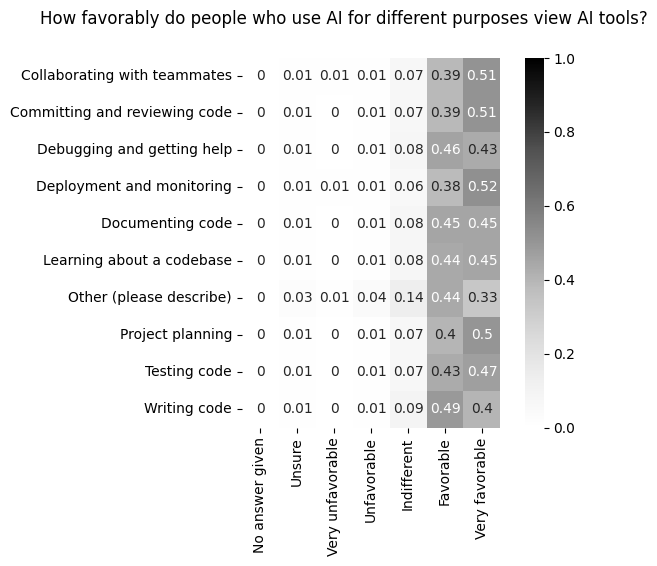

In [37]:
fig, axis = create_heatmap(
    favorability_crosstab.round(2)
)

fig.suptitle("How favorably do people who use AI for different purposes view AI tools?")

axis.set(xlabel=None, ylabel=None)

plt.show()

Interestingly writing code is the most popular use case, but the smallest percentage of users who find it "very favorable".

Let's do the same but for "do you trust the output?"

In [38]:
tool_trust_dfs = []
for col in ai_tool_indicators.columns:
    option_df = (
        survey_ai_users[survey_ai_users[col] == 1]
        .groupby("AIBen")
        .size()
        .reset_index(name="count")
        .assign(option=col)
    )
    tool_trust_dfs.append(option_df)

options_vs_trust = pd.concat(tool_trust_dfs, axis=0, ignore_index=True)

print(options_vs_trust.shape)
options_vs_trust.head()

(60, 3)


,AIBen,count,option
0,No answer given,2,Collaborating with teammates
1,Highly distrust,43,Collaborating with teammates
2,Somewhat distrust,143,Collaborating with teammates
3,Neither trust nor distrust,317,Collaborating with teammates
4,Somewhat trust,705,Collaborating with teammates


In [39]:
trust_crosstab = (
    pd.crosstab(index=options_vs_trust["option"],
                columns=options_vs_trust["AIBen"],
                values=options_vs_trust["count"],
                aggfunc="sum",
                normalize="index")
)

trust_crosstab

AIBen,No answer given,Highly distrust,Somewhat distrust,Neither trust nor distrust,Somewhat trust,Highly trust
option,,,,,,
Collaborating with teammates,0.001452,0.031227,0.103849,0.230211,0.511983,0.121278
Committing and reviewing code,0.001051,0.024435,0.115607,0.248292,0.524435,0.086180
Debugging and getting help,0.000325,0.041764,0.172913,0.257688,0.486088,0.041221
Deployment and monitoring,0.001119,0.030201,0.101230,0.232662,0.507271,0.127517
Documenting code,0.000386,0.045051,0.172491,0.276016,0.464630,0.041426
Learning about a codebase,0.000705,0.036828,0.147577,0.259119,0.497709,0.058062
Other (please describe),0.000000,0.138169,0.267703,0.246978,0.283247,0.063903
Project planning,0.000981,0.034726,0.138120,0.258191,0.500687,0.067294
Testing code,0.000556,0.039667,0.158667,0.266222,0.478889,0.056000


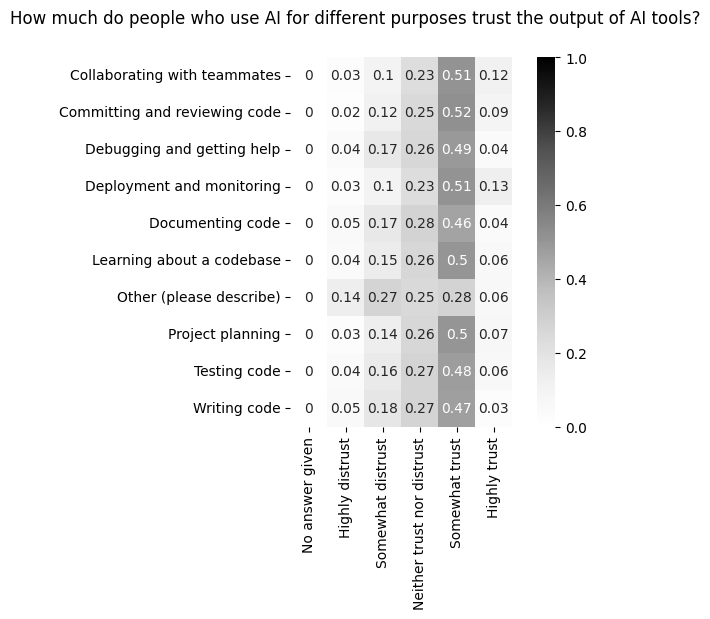

In [40]:
fig, axis = create_heatmap(
    trust_crosstab.round(2)
)

fig.suptitle("How much do people who use AI for different purposes trust the output of AI tools?")

axis.set(xlabel=None, ylabel=None)

plt.show()

It seems like most people generally "somewhat trust" the output of an AI regardless of what they use it for. Free text responses are not included, so we can't look into the values from the "Other" category.

Finally for "how people use AI", what do people in different job roles use it for?

In [41]:
survey_ai_users["DevType"].value_counts(dropna=False)

Developer, full-stack                            12316
NaN                                               5509
Developer, back-end                               5499
Developer, front-end                              2622
Other (please specify):                           1221
Developer, mobile                                 1126
Student                                           1106
Developer, desktop or enterprise applications     1087
Data scientist or machine learning specialist      953
Engineering manager                                823
Senior Executive (C-Suite, VP, etc.)               681
DevOps specialist                                  600
Academic researcher                                571
Engineer, data                                     534
Research & Development role                        500
Developer, embedded applications or devices        486
Cloud infrastructure engineer                      467
Data or business analyst                           349
Developer,

We should really cut these categories down a bit. Let's group all developers together for a start, careful not to include "developer advocate" and "developer experience" as they're not primarily code-writing roles.

In [42]:
devtypes = (
    survey_ai_users
    .dropna(subset=["DevType"])
    .query("DevType.str.startswith('Developer')")
    .loc[:,"DevType"]
)

devtypes.value_counts()

Developer, full-stack                            12316
Developer, back-end                               5499
Developer, front-end                              2622
Developer, mobile                                 1126
Developer, desktop or enterprise applications     1087
Developer, embedded applications or devices        486
Developer, game or graphics                        326
Developer, QA or test                              231
Developer Experience                               139
Developer Advocate                                  98
Name: DevType, dtype: int64

Let's build up a mapping between `DevType` column and a new, higher category

In [43]:
devtype_map = {}

dev_exclusions = ["Developer Experience", "Developer Advocate"]

dev_devtypes = [col for col in devtypes.value_counts().index if col not in dev_exclusions]

for col in dev_devtypes:
    devtype_map[col] = "Developer"

Let's look at what else to group together.

Engineers also look like good candidates.

In [44]:
eng_devtypes = (
    survey_ai_users
    .dropna(subset=["DevType"])
    .query("DevType.str.contains('engineer', case=False)")
    .loc[:,"DevType"]
)

eng_devtypes.value_counts()

Engineering manager              823
Engineer, data                   534
Cloud infrastructure engineer    467
Engineer, site reliability       160
Hardware Engineer                 80
Name: DevType, dtype: int64

In [45]:
for col in ['Engineer, data', 'Cloud infrastructure engineer',
            'Engineer, site reliability', 'Hardware Engineer']:
    devtype_map[col] = "Engineer"

Let's create a new job type category and look at how it compares against what people use AI for.

In [46]:
survey_ai_users["job_category"] = survey_ai_users["DevType"].replace(devtype_map)
survey_ai_users["job_category"].value_counts(dropna=False)

Developer                                        23693
NaN                                               5509
Engineer                                          1241
Other (please specify):                           1221
Student                                           1106
Data scientist or machine learning specialist      953
Engineering manager                                823
Senior Executive (C-Suite, VP, etc.)               681
DevOps specialist                                  600
Academic researcher                                571
Research & Development role                        500
Data or business analyst                           349
System administrator                               257
Project manager                                    232
Blockchain                                         200
Product manager                                    183
Educator                                           174
Security professional                              171
Developer 

In [47]:
tool_job_dfs = []

for col in ai_tool_indicators.columns:
    option_df = (
        survey_ai_users[survey_ai_users[col] == 1]
        .dropna(subset="job_category")
        .groupby("job_category")
        .size()
        .reset_index(name="count")
        .assign(option=col)
    )
    tool_job_dfs.append(option_df)

options_vs_jobs = pd.concat(tool_job_dfs, axis=0, ignore_index=True)

print(options_vs_jobs.shape)
options_vs_jobs.head()

(228, 3)


,job_category,count,option
0,Academic researcher,19,Collaborating with teammates
1,Blockchain,11,Collaborating with teammates
2,Data or business analyst,20,Collaborating with teammates
3,Data scientist or machine learning specialist,42,Collaborating with teammates
4,Database administrator,6,Collaborating with teammates


In [48]:
job_crosstab = (
    pd.crosstab(index=options_vs_jobs["option"],
                columns=options_vs_jobs["job_category"],
                values=options_vs_jobs["count"],
                aggfunc="sum",
                normalize="columns")
    .transpose()
)

job_crosstab

option,Collaborating with teammates,Committing and reviewing code,Debugging and getting help,Deployment and monitoring,Documenting code,Learning about a codebase,Other (please describe),Project planning,Testing code,Writing code
job_category,,,,,,,,,,
Academic researcher,0.014243,0.029235,0.186657,0.015742,0.160420,0.130435,0.014243,0.051724,0.071964,0.325337
Blockchain,0.019366,0.036972,0.163732,0.033451,0.153169,0.161972,0.003521,0.059859,0.093310,0.274648
Data or business analyst,0.021763,0.039173,0.207835,0.017410,0.112078,0.153428,0.008705,0.068553,0.075082,0.295974
Data scientist or machine learning specialist,0.017640,0.040319,0.186056,0.019740,0.158337,0.118018,0.005040,0.055019,0.083158,0.316674
Database administrator,0.034884,0.046512,0.151163,0.040698,0.127907,0.186047,0.000000,0.075581,0.093023,0.244186
Designer,0.042042,0.036036,0.198198,0.030030,0.102102,0.147147,0.024024,0.093093,0.078078,0.249249
DevOps specialist,0.014668,0.042092,0.197066,0.034439,0.140306,0.112883,0.003827,0.049745,0.086735,0.318240
Developer,0.013471,0.038032,0.189265,0.018009,0.135309,0.114323,0.005834,0.047544,0.102410,0.335803
Developer Advocate,0.015936,0.035857,0.147410,0.015936,0.167331,0.143426,0.000000,0.067729,0.107570,0.298805


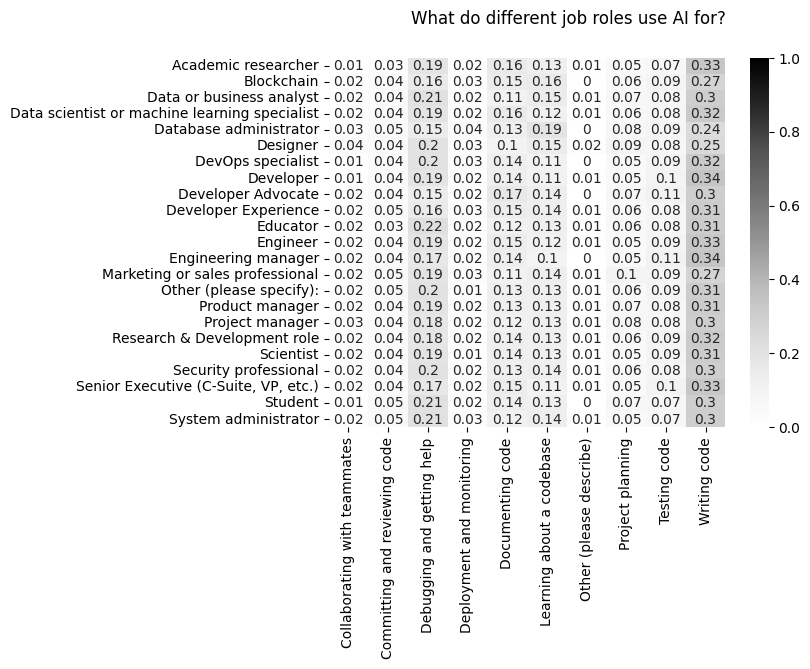

In [49]:
fig, axis = create_heatmap(
    job_crosstab.round(2),
    square=False
)

fig.suptitle("What do different job roles use AI for?")

axis.set(xlabel=None, ylabel=None)

plt.show()

Looks like a bit of variation. There are jobs that use it for writing code more than others, and some interesting points like DBAs using AI to learn about a codebase more than other job roles, and developer advocates using it for documentation more than others.

Next up: the relationship between someone's years of experience and their attitude towards AI

In [50]:
survey_ai_users["YearsCodePro"].unique()

array(['9', '4', '21', '3', '15', nan, 'Less than 1 year', '10', '2', '6',
       '14', '7', '5', '16', '20', '11', '12', '19', '8', '50', '27',
       '13', '1', '18', '44', '22', '25', '24', '17', '26', '37', '30',
       'More than 50 years', '23', '32', '39', '28', '35', '36', '33',
       '34', '41', '31', '40', '38', '29', '43', '42', '45', '48', '47',
       '49', '46'], dtype=object)

This isn't numeric, but this is one categorical column we can actually make numeric

In [51]:
survey_ai_users["YearsCodePro"] = (
    survey_ai_users["YearsCodePro"]
    .replace({
        'Less than 1 year': 0,
        'More than 50 years': 50
    })
    .astype(float) # to account for NULLs
)

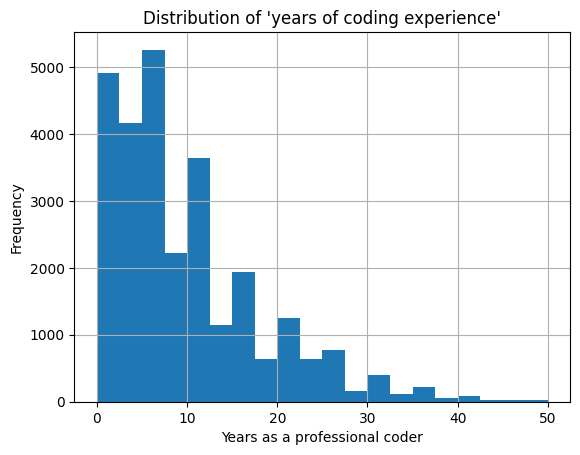

In [52]:
fig, axis = plt.subplots()

survey_ai_users["YearsCodePro"].hist(bins=20, ax=axis)

axis.set(
    title="Distribution of 'years of coding experience'",
    xlabel="Years as a professional coder",
    ylabel="Frequency"
)

plt.show()

Most people have been coding for less than 10 years, but with a long tail out to 50 years experience.

To test the relationship between experience and attitudes towards AI we can't just use correlation, since one of our variables is not continuous. One option is to look at the distribution of age by different attitudes to see what age groups each attitude is representative of:

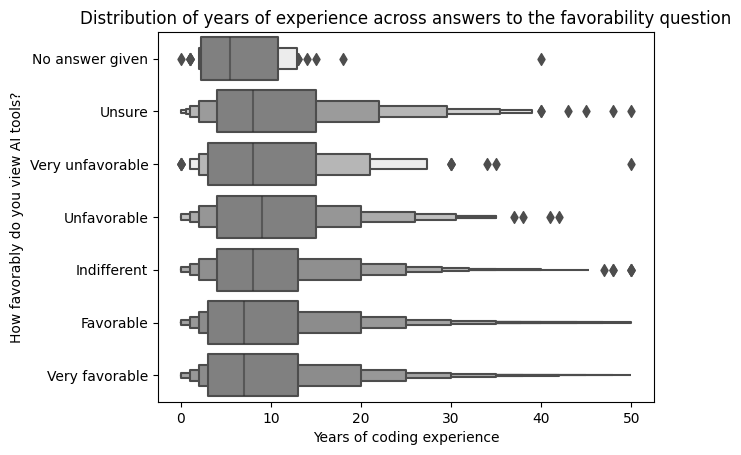

In [53]:
fig, axis = plt.subplots()

sns.boxenplot(
    data=survey_ai_users,
    x="YearsCodePro", y="AISent",
    color="gray",
    ax=axis
)

axis.set(
    title="Distribution of years of experience across answers to the favorability question",
    xlabel="Years of coding experience",
    ylabel="How favorably do you view AI tools?"
)

plt.show()

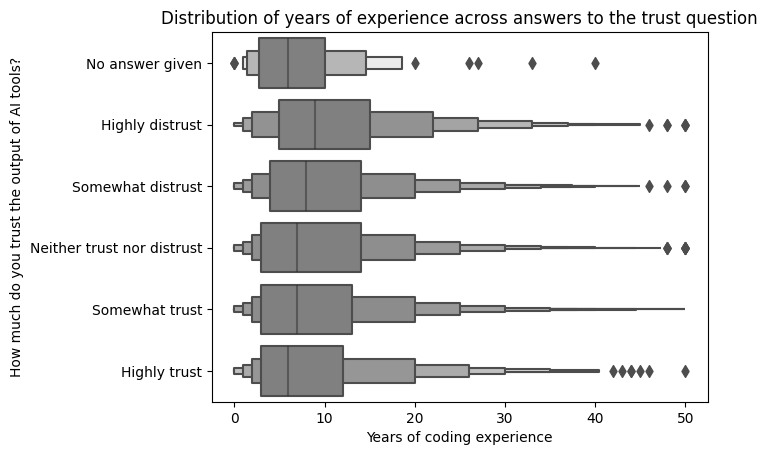

In [54]:
fig, axis = plt.subplots()

sns.boxenplot(
    data=survey_ai_users,
    x="YearsCodePro", y="AIBen",
    color="gray",
    ax=axis
)

axis.set(
    title="Distribution of years of experience across answers to the trust question",
    xlabel="Years of coding experience",
    ylabel="How much do you trust the output of AI tools?"
)

plt.show()

Quite a lot of noise, but the median years of experience of those distrustful of AI is higher.

What about viewed the other way, that is: what is the distribution of favorability/trust scores across experience groups?

We can bin our continuous experience column:

<Axes: >

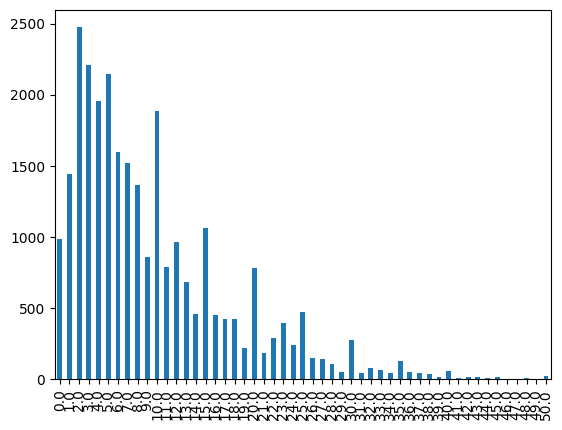

In [55]:
survey_ai_users["YearsCodePro"].value_counts().sort_index().plot.bar()

In [56]:
exp_bins = pd.cut(survey_ai_users["YearsCodePro"],
                  bins=[-1, 0, 2, 5, 10, 20, 50],
                  labels=["0", "1-2 years", "3-5 years",
                          "6-10 years", "11-20 years",
                          "over 20 years"]
                 )

# verify the groups
survey_ai_users.groupby(exp_bins)["YearsCodePro"].agg(["min", "max"])

,min,max
YearsCodePro,,
0,0.0,0.0
1-2 years,1.0,2.0
3-5 years,3.0,5.0
6-10 years,6.0,10.0
11-20 years,11.0,20.0
over 20 years,21.0,50.0


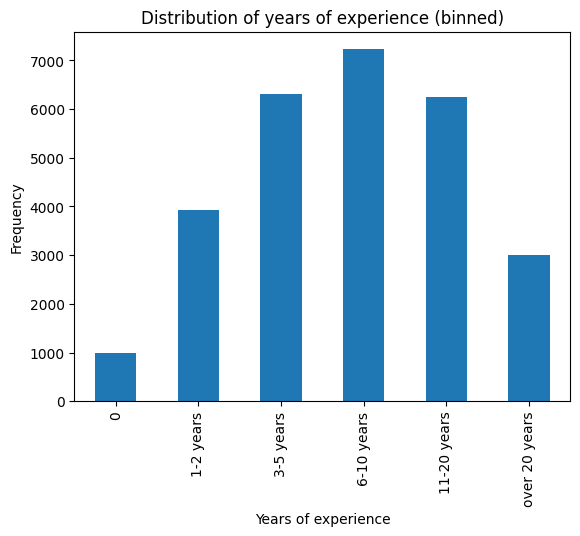

In [57]:
fig, axis = plt.subplots()

(
    exp_bins
    .value_counts()
    .sort_index()
    .plot
    .bar(ax=axis)
)

axis.set(
    title="Distribution of years of experience (binned)",
    xlabel="Years of experience",
    ylabel="Frequency"
)

plt.show()

In [58]:
exp_vs_sent = pd.crosstab(
    index=exp_bins,
    columns=survey_ai_users["AISent"],
    normalize="index"
)

exp_vs_sent

AISent,No answer given,Unsure,Very unfavorable,Unfavorable,Indifferent,Favorable,Very favorable
YearsCodePro,,,,,,,
0,0.001011,0.015167,0.004044,0.018200,0.104146,0.505561,0.351871
1-2 years,0.002552,0.017096,0.004083,0.015310,0.101046,0.510079,0.349834
3-5 years,0.001587,0.014596,0.001745,0.015865,0.104871,0.488974,0.372362
6-10 years,0.001384,0.016602,0.004289,0.019231,0.112618,0.476065,0.369812
11-20 years,0.001599,0.017426,0.003197,0.023341,0.112390,0.483933,0.358114
over 20 years,0.000332,0.021920,0.004318,0.020923,0.107938,0.474925,0.369645


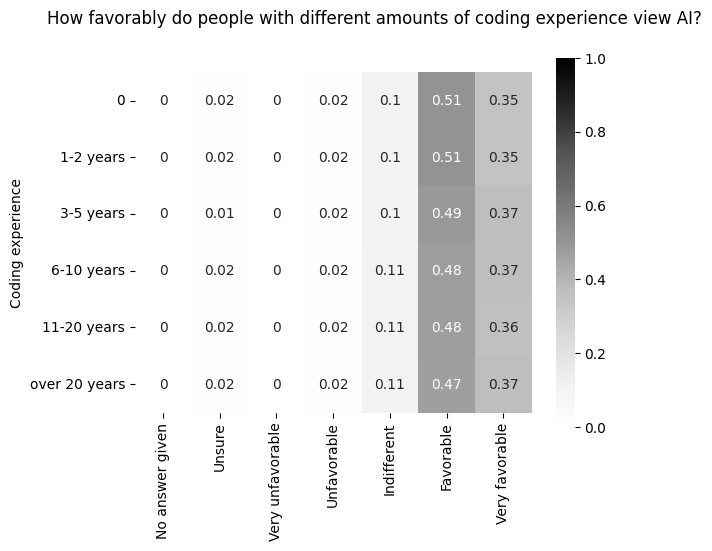

In [59]:
fig, axis = create_heatmap(
    exp_vs_sent.round(2)
)

fig.suptitle("How favorably do people with different amounts of coding experience view AI?")

axis.set(
    xlabel=None,
    ylabel="Coding experience"
)

plt.show()

Not a huge difference, but what about trust?

In [60]:
exp_vs_trust = pd.crosstab(
    index=exp_bins,
    columns=survey_ai_users["AIBen"],
    normalize="index"
)

exp_vs_trust

AIBen,No answer given,Highly distrust,Somewhat distrust,Neither trust nor distrust,Somewhat trust,Highly trust
YearsCodePro,,,,,,
0,0.003033,0.040445,0.172902,0.266936,0.479272,0.037412
1-2 years,0.004083,0.039806,0.173258,0.282470,0.466956,0.033427
3-5 years,0.002856,0.044423,0.181501,0.278597,0.456132,0.036491
6-10 years,0.002905,0.058522,0.197842,0.288877,0.422939,0.028915
11-20 years,0.002238,0.064109,0.203197,0.296243,0.407834,0.026379
over 20 years,0.001328,0.076054,0.205912,0.279309,0.406177,0.031219


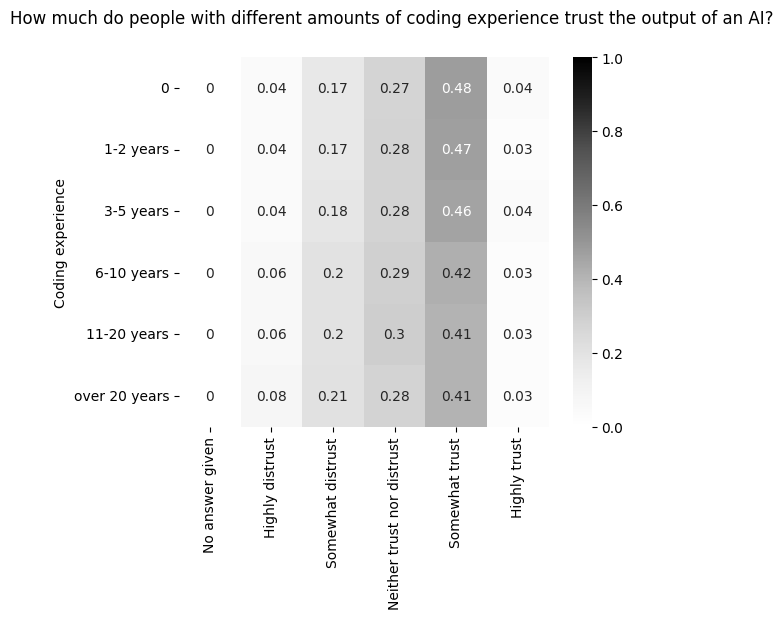

In [61]:
fig, axis = create_heatmap(
    exp_vs_trust.round(2)
)

fig.suptitle("How much do people with different amounts of coding experience trust the output of an AI?")

axis.set(
    xlabel=None,
    ylabel="Coding experience"
)

plt.show()

There's definitely something about people with >5 years experience being less trusting in AI output.

How does this relationship translate to statistics? If these were continuous measures we could calculate the correlation, but we can't do that if the variables are categorical.

Let's calculate Spearman's rank correlation and Kendall's tau. These are both rank-based, so first we need to rank the trust variable, which we can only do if it's numeric. We can only add numeric values to the answers that aren't "No answer given", otherwise the data isn't really ordinal.

In [62]:
trust_exp_data = (
    survey_ai_users
    .dropna(subset=["YearsCodePro", "AIBen"], how="any")
    .loc[survey_ai_users["AIBen"] != "No answer given", :]
)

trust_rank = (
    pd.Series(
        trust_exp_data["AIBen"]
        .factorize(sort=True)[0]
    )
    .rank()
)

trust_rank

0         4187.0
1        20758.5
2        20758.5
3         4187.0
4         4187.0
          ...   
27624      765.0
27625    10799.0
27626    20758.5
27627    20758.5
27628    10799.0
Length: 27629, dtype: float64

In [63]:
from scipy.stats import spearmanr, kendalltau

correlation, p_value = spearmanr(
    trust_exp_data["YearsCodePro"],
    trust_rank
)

print("Spearman's\n", correlation, p_value)

correlation, p_value = kendalltau(
    trust_exp_data["YearsCodePro"],
    trust_rank
)

print("Kendall's tau\n", correlation, p_value)

Spearman's
 -0.0650445414009189 2.6886332522054823e-27
Kendall's tau
 -0.05052236119624125 2.5557806077186822e-27


That looks like both tests agree that we have statistically significant non-correlation. That means although there's a difference in the median years of experience of each trust category, there isn't a statistically significant relationship between them.

Finally, what about what people who use AI are **not** interested in using AI for?

In [64]:
ai_not_interested_indicators = (
    survey.loc[survey["AISelect"] == "Yes", "AIToolNot interested in Using"]
    .str.get_dummies(sep=";")
)
ai_not_interested_indicators

,Collaborating with teammates,Committing and reviewing code,Debugging and getting help,Deployment and monitoring,Documenting code,Learning about a codebase,Other (please describe),Project planning,Testing code,Writing code
1,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,1,0,0
6,1,1,0,1,1,1,0,1,1,1
7,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
89176,0,0,0,0,0,0,0,0,0,0
89179,0,0,0,1,0,0,0,0,0,0
89180,1,1,0,1,0,0,0,1,0,0
89182,0,1,0,0,0,0,0,0,0,0


First, a summary:

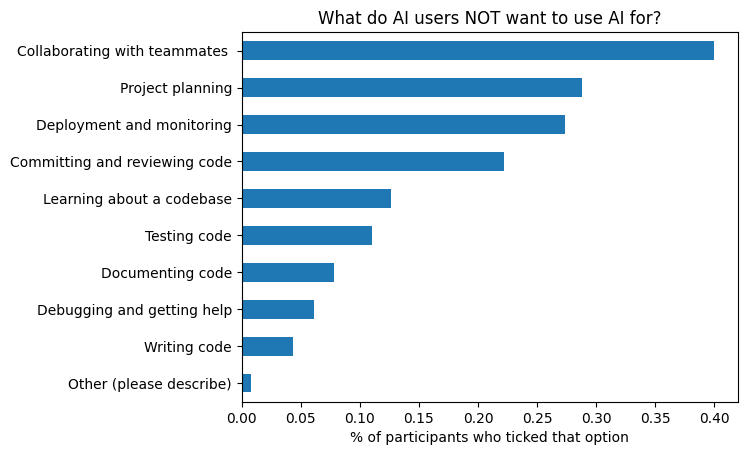

In [65]:
fig, axis = plt.subplots()

(
    ai_not_interested_indicators
    .mean()
    .sort_values()
    .plot
    .barh(ax=axis)
)

axis.set(
    title="What do AI users NOT want to use AI for?",
    xlabel="% of participants who ticked that option"
)

plt.show()

This by job role:

(first, add to original data to add "not interested" indicators):

In [66]:
# concat will by default match on indices
ai_users_not_int = (
    pd.concat([survey, ai_not_interested_indicators], axis=1)
    .dropna(subset=ai_not_interested_indicators.columns, how="any") # drop nulls
)

assert len(survey[survey["AISelect"] == "Yes"]) == len(ai_users_not_int)

ai_users_not_int.head()

,ResponseId,Q120,MainBranch,Age,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,Collaborating with teammates,Committing and reviewing code,Debugging and getting help,Deployment and monitoring,Documenting code,Learning about a codebase,Other (please describe),Project planning,Testing code,Writing code
1,2,I agree,I am a developer by profession,25-34 years old,"Employed, full-time",Remote,Hobby;Contribute to open-source projects;Boots...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;Friend or fam...,Formal documentation provided by the owner of ...,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,I agree,I am a developer by profession,25-34 years old,"Employed, full-time;Independent contractor, fr...",Remote,Hobby;Contribute to open-source projects;Profe...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Online Courses or Certi...,Formal documentation provided by the owner of ...,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,6,I agree,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Hobby;Professional development or self-paced l...,Some college/university study without earning ...,Books / Physical media;Colleague;Online Course...,Formal documentation provided by the owner of ...,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
6,7,I agree,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Hobby;Contribute to open-source projects;Profe...,Some college/university study without earning ...,Friend or family member;Online Courses or Cert...,NaN,...,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0
7,8,I agree,I am a developer by profession,25-34 years old,"Employed, full-time",Remote,Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Online Courses or Certi...,Formal documentation provided by the owner of ...,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [67]:
ai_users_not_int["job_category"] = ai_users_not_int["DevType"].replace(devtype_map)

not_interested_job_dfs = []

for col in ai_not_interested_indicators.columns:
    option_df = (
        ai_users_not_int[ai_users_not_int[col] == 1]
        .dropna(subset="job_category")
        .groupby("job_category")
        .size()
        .reset_index(name="count")
        .assign(option=col)
    )
    not_interested_job_dfs.append(option_df)

not_interested_options_vs_jobs = pd.concat(not_interested_job_dfs, axis=0, ignore_index=True)

print(not_interested_options_vs_jobs.shape)
not_interested_options_vs_jobs.head()

(224, 3)


,job_category,count,option
0,Academic researcher,231,Collaborating with teammates
1,Blockchain,78,Collaborating with teammates
2,Data or business analyst,118,Collaborating with teammates
3,Data scientist or machine learning specialist,357,Collaborating with teammates
4,Database administrator,26,Collaborating with teammates


In [68]:
job_not_int_crosstab = (
    pd.crosstab(index=not_interested_options_vs_jobs["option"],
                columns=not_interested_options_vs_jobs["job_category"],
                values=not_interested_options_vs_jobs["count"],
                aggfunc="sum",
                normalize="columns")
    .transpose()
)

job_not_int_crosstab

option,Collaborating with teammates,Committing and reviewing code,Debugging and getting help,Deployment and monitoring,Documenting code,Learning about a codebase,Other (please describe),Project planning,Testing code,Writing code
job_category,,,,,,,,,,
Academic researcher,0.239378,0.135751,0.044560,0.173057,0.041451,0.087047,0.004145,0.184456,0.064249,0.025907
Blockchain,0.267123,0.133562,0.034247,0.184932,0.044521,0.047945,0.003425,0.181507,0.065068,0.037671
Data or business analyst,0.245322,0.164241,0.033264,0.185031,0.054054,0.056133,0.006237,0.149688,0.087318,0.018711
Data scientist or machine learning specialist,0.245868,0.133609,0.034435,0.171488,0.035813,0.082645,0.007576,0.192149,0.069559,0.026860
Database administrator,0.224138,0.146552,0.060345,0.155172,0.112069,0.060345,0.000000,0.163793,0.068966,0.008621
Designer,0.250000,0.125000,0.014706,0.191176,0.058824,0.073529,0.000000,0.183824,0.073529,0.029412
DevOps specialist,0.263374,0.136831,0.034979,0.148148,0.041152,0.082305,0.000000,0.215021,0.059671,0.018519
Developer,0.251489,0.137906,0.038502,0.166983,0.048034,0.080421,0.004486,0.186394,0.059595,0.026193
Developer Advocate,0.276119,0.134328,0.029851,0.141791,0.037313,0.059701,0.007463,0.231343,0.052239,0.029851


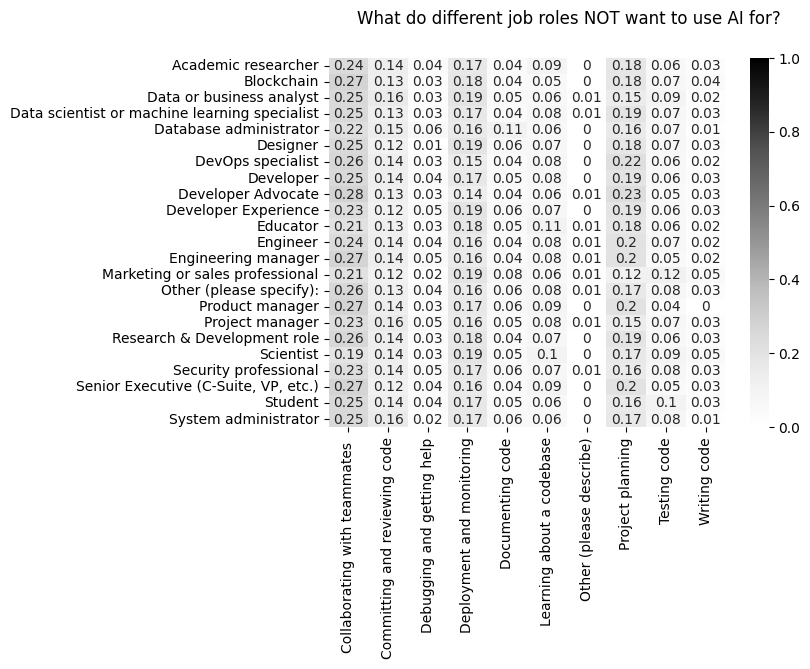

In [69]:
fig, axis = create_heatmap(
    job_not_int_crosstab.round(2),
    square=False
)

fig.suptitle("What do different job roles NOT want to use AI for?")

axis.set(xlabel=None, ylabel=None)

plt.show()

Most people don't want to use AI for collaboration, deployment/monitoring, committing code, or project planning. Unsurprisingly, jobs like marketing that don't require coding won't use it for testing code.

Other avenues:

- did people who answered "I can't find/share info in my business" say they'd use AI for these?
- did people who said they need more help from their team say they'd use AI for this?
- what about "how long do you search for information" vs. AI usage?